In [2]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.prediction_algorithms import KNNBaseline
from surprise import accuracy
from surprise.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
ratings = pd.read_csv('ratings.csv').drop('timestamp', axis=1)
# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(0.5, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.20)

In [43]:
sim_options = {'name': 'cosine',
               'user_based': True  # compute  similarities between items
               }
algo = KNNBaseline(k=50,sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)
print("Done!")

items
cosine
k=3
RMSE: 1.0210
MAE:  0.7857
k=5
RMSE: 0.9739
MAE:  0.7520
k=10
RMSE: 0.9309
MAE:  0.7194
k=15
RMSE: 0.9158
MAE:  0.7074
k=25
RMSE: 0.9027
MAE:  0.6972
k=35
RMSE: 0.8956
MAE:  0.6909
k=50
RMSE: 0.8897
MAE:  0.6860
{'test_rmse': array([0.89247393, 0.88908355, 0.8837542 , 0.89403279, 0.89378239]),
 'test_mae': array([0.68876305, 0.68766977, 0.67913843, 0.68976191, 0.68782709]),
 'fit_time': (16.20528268814087,
  13.578936100006104,
  13.72315239906311,
  13.53808045387268,
  13.360702753067017),
 'test_time': (8.049751281738281,
  6.889881610870361,
  7.0624680519104,
  7.129979372024536,
  6.9723193645477295)}

pearson_baseline
k=3
RMSE: 0.9208
MAE:  0.6989
k=5
RMSE: 0.8883
MAE:  0.6754
k=10
RMSE: 0.8627
MAE:  0.6564
k=15
RMSE: 0.8575
MAE:  0.6525
k=25
RMSE: 0.8545
MAE:  0.6508
k=35
RMSE: 0.8536
MAE:  0.6503
k=50
RMSE: 0.8534  
MAE:  0.6503
{'test_rmse': array([0.85046935, 0.84853418, 0.85023995, 0.8519139 , 0.85764096]),
 'test_mae': array([0.64903324, 0.64620184, 0.6498046 , 0.65083999, 0.65148166]),
 'fit_time': (9.278536319732666,
  10.428720712661743,
  11.609328508377075,
  12.970061302185059,
  12.18370795249939),
 'test_time': (7.756534576416016,
  9.099326133728027,
  10.165886402130127,
  9.895185470581055,
  9.570289611816406)}

user
pearson_baseline
k=3
RMSE: 0.9294
MAE:  0.7123
k=5
RMSE: 0.9028
MAE:  0.6887
k=10
RMSE: 0.8850
MAE:  0.6747
k=15
RMSE: 0.8816
MAE:  0.6718
k=25
RMSE: 0.8805
MAE:  0.6710
k=35
RMSE: 0.8805
MAE:  0.6711
k=50
RMSE: 0.8807
MAE:  0.6714
    {'test_rmse': array([0.88662025, 0.87456741, 0.87967146, 0.86937712, 0.87978704]),
 'test_mae': array([0.67420659, 0.66683974, 0.66950334, 0.66157721, 0.66828099]),
 'fit_time': (0.8501498699188232,
  0.6966266632080078,
  0.9530675411224365,
  0.6322429180145264,
  0.6700284481048584),
 'test_time': (1.69984769821167,
  2.04990816116333,
  1.889725685119629,
  1.5583720207214355,
  2.0003013610839844)}

#cosine
k=3
RMSE: 0.9534
MAE:  0.7354
k=5
RMSE: 0.9135
MAE:  0.7030
k=10
RMSE: 0.8904
MAE:  0.6839
k=15
RMSE: 0.8843
MAE:  0.6780
k=25
RMSE: 0.8823
MAE:  0.6758
k=35
RMSE: 0.8831
MAE:  0.6763
k=50
RMSE: 0.8838
MAE:  0.6769
    {'test_rmse': array([0.87923194, 0.87746348, 0.86960622, 0.8824154 , 0.88254479]),
 'test_mae': array([0.67260679, 0.66981262, 0.66954471, 0.67314565, 0.67512905]),
 'fit_time': (0.725813627243042,
  0.8508312702178955,
  0.923314094543457,
  1.1071879863739014,
  0.7447547912597656),
 'test_time': (2.234978675842285,
  2.2198524475097656,
  3.4060637950897217,
  2.372684955596924,
  1.8248953819274902)}

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8838
MAE:  0.6769
Done!


In [71]:
sim_options = {'name': 'cosine',
               'user_based': True, 'k' :3 # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)

cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=200, verbose=True)

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Comput

Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Est

Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matri

{'test_rmse': array([0.86941784, 0.88463503, 0.83635863, 0.86596581, 0.81982984,
        0.89913446, 0.82523394, 0.81930153, 0.85656403, 0.85323887,
        0.85954588, 0.92048642, 0.85253569, 0.81847494, 0.91304524,
        0.86743755, 0.86898906, 0.8236793 , 0.89204762, 0.85615071,
        0.84249881, 0.85362451, 0.85154126, 0.91293598, 0.89761753,
        0.83271652, 0.85701164, 0.88020584, 0.84170966, 0.853389  ,
        0.87030635, 0.88680322, 0.87193355, 0.88112435, 0.90193379,
        0.87263697, 0.88292863, 0.87782375, 0.88353773, 0.85281685,
        0.92062772, 0.87937986, 0.91500464, 0.86899418, 0.80687194,
        0.89266621, 0.80583936, 0.81619308, 0.89429904, 0.81939806,
        0.87940311, 0.887626  , 0.87629296, 0.88810107, 0.84980954,
        0.87690822, 0.87301721, 0.88341147, 0.89654461, 0.94984997,
        0.89030253, 0.92510542, 0.83292688, 0.89313051, 0.85602025,
        0.89366859, 0.83073575, 0.81715797, 0.89633486, 0.90430063,
        0.8611059 , 0.86889907, 0.8

In [66]:
algo =SVD()
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8706  0.8624  0.8606  0.8839  0.8723  0.8525  0.8771  0.8711  0.8599  0.8688  0.8679  0.0087  
MAE (testset)     0.6688  0.6604  0.6615  0.6781  0.6682  0.6590  0.6742  0.6694  0.6598  0.6671  0.6666  0.0061  
Fit time          10.45   9.49    6.69    9.35    9.97    9.60    9.98    10.57   9.30    9.26    9.47    1.03    
Test time         0.16    0.27    0.14    0.11    0.12    0.15    0.12    0.12    0.20    0.06    0.14    0.05    


{'test_rmse': array([0.87063395, 0.86241614, 0.86055905, 0.88390176, 0.87226878,
        0.85254621, 0.87710879, 0.87111236, 0.85986327, 0.86879673]),
 'test_mae': array([0.66875071, 0.66039278, 0.66147603, 0.67808605, 0.66823748,
        0.65895338, 0.67422683, 0.66937235, 0.65978271, 0.66705897]),
 'fit_time': (10.450277090072632,
  9.489500761032104,
  6.68694543838501,
  9.350193738937378,
  9.967321634292603,
  9.59963059425354,
  9.976739406585693,
  10.573789358139038,
  9.303080558776855,
  9.256270408630371),
 'test_time': (0.15992259979248047,
  0.26581263542175293,
  0.13577914237976074,
  0.11483383178710938,
  0.12240076065063477,
  0.1486525535583496,
  0.11537885665893555,
  0.11508917808532715,
  0.20110511779785156,
  0.06021618843078613)}

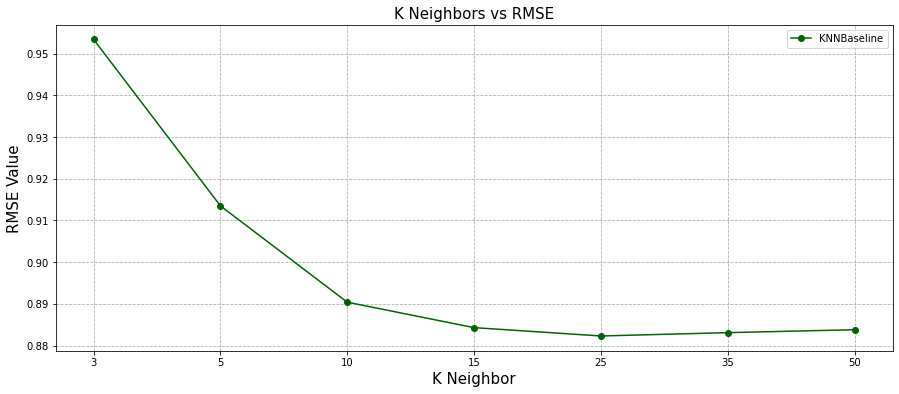

<Figure size 1800x1200 with 0 Axes>

In [17]:
x_algo = ['3','5','10','15','25','35','50',]
rmse = [0.9534, 0.9135, 0.8904, 0.8843, 0.8823, 0.8831,0.8838]

plt.figure(figsize=(15,6))
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse, label='KNNBaseline', color='darkgreen', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.figure(dpi=300)
plt.show()



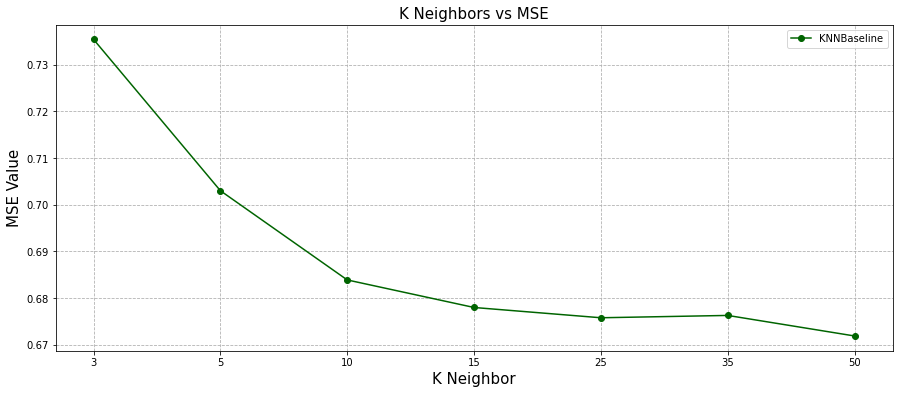

<Figure size 1800x1200 with 0 Axes>

In [16]:
x_algo = ['3','5','10','15','25','35','50',]
mse = [0.7354, 0.7030, 0.6839, 0.6780,0.6758,0.6763,0.6719]

plt.figure(figsize=(15,6))
plt.title('K Neighbors vs MSE', loc='center', fontsize=15)
plt.plot(x_algo, mse, label='KNNBaseline', color='darkgreen', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')
plt.figure(dpi=300)
plt.show()

In [14]:
sim_options = {'name': 'msd',
               'user_based': False  # compute  similarities between items
               }
algo = KNNBaseline(sim_options=sim_options)

algo.fit(trainset)
predictions = algo.test(testset)

accuracy.rmse(predictions)
accuracy.mae(predictions)

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.8666
MAE:  0.6658


0.6657977601328169

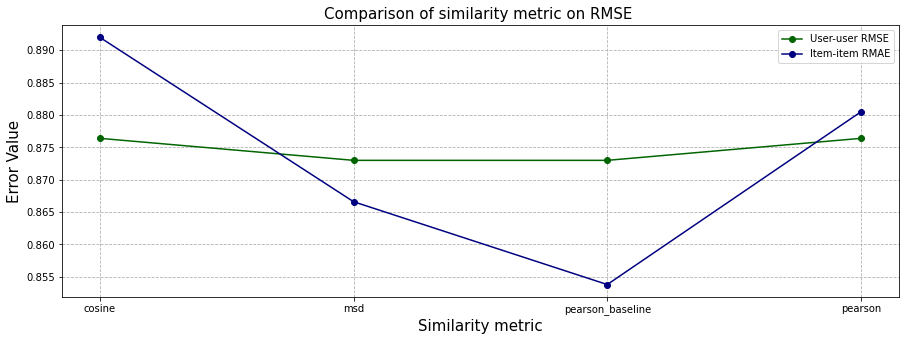

<Figure size 1800x1200 with 0 Axes>

In [15]:
x_algo = ['cosine', 'msd', 'pearson_baseline', 'pearson']

user_rmse = [0.8764, 0.8730, 0.8730, 0.8764]
item_rmse = [0.8920,  0.8666,0.8538, 0.8805 ]

user_mae = [0.6724, 0.6690, 0.6664, 0.6711]
item_mae = [0.6892,  0.6658,0.6514, 0.6782 ]

plt.figure(figsize=(15,5))


plt.title('Comparison of similarity metric on RMSE ', loc='center', fontsize=15)
plt.plot(x_algo, user_rmse, label='User-user RMSE', color='darkgreen', marker='o')

plt.xlabel('Similarity metric', fontsize=15)
plt.ylabel('Error Value', fontsize=15)

plt.plot(x_algo, item_rmse, label='Item-item RMAE', color='navy', marker='o')


plt.legend()
plt.grid(ls='dashed')
plt.figure(dpi=300)
plt.show()

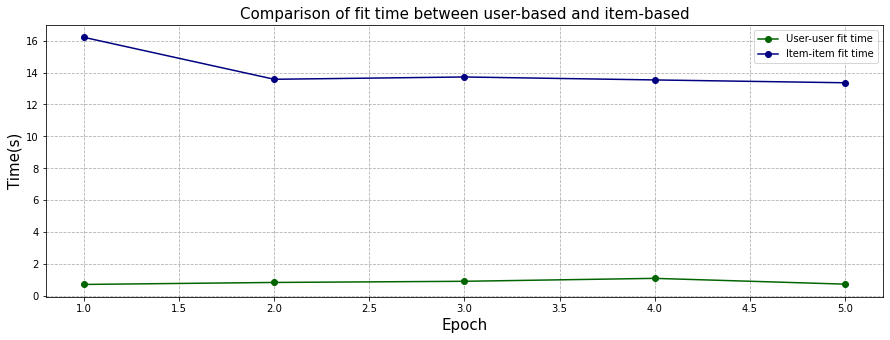

<Figure size 1800x1200 with 0 Axes>

In [18]:
x_algo = [1,2,3,4,5]

fit_time_cosine_user = [0.725813627243042,
  0.8508312702178955,
  0.923314094543457,
  1.1071879863739014,
  0.7447547912597656]
test_time_cosine_user = [2.234978675842285,
  2.2198524475097656,
  3.4060637950897217,
  2.372684955596924,
  1.8248953819274902]

fit_time_cosine_items = [16.20528268814087,
  13.578936100006104,
  13.72315239906311,
  13.53808045387268,
  13.360702753067017]
test_time_cosine_items = [8.049751281738281,
  6.889881610870361,
  7.0624680519104,
  7.129979372024536,
  6.9723193645477295]

plt.figure(figsize=(15,5))

# plt.subplot(1, 2, 1)plt.title('Comparison of fit time between user-based and item-based', loc='center', fontsize=15)
plt.plot(x_algo, fit_time_cosine_user, label='User-user fit time', color='darkgreen', marker='o')
plt.plot(x_algo, fit_time_cosine_items, label='Item-item fit time', color='navy', marker='o')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Time(s)', fontsize=15)

plt.legend()
plt.grid(ls='dashed')
plt.figure(dpi=300)
plt.show()

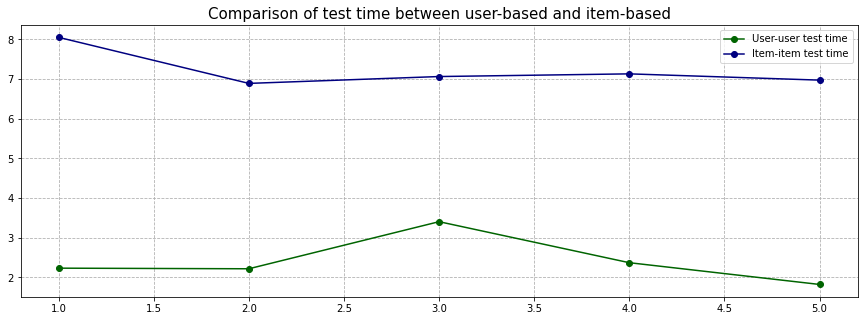

<Figure size 1800x1200 with 0 Axes>

In [19]:
x_algo = [1,2,3,4,5]
test_time_cosine_items = [8.049751281738281,
  6.889881610870361,
  7.0624680519104,
  7.129979372024536,
  6.9723193645477295]
test_time_cosine_user = [2.234978675842285,
  2.2198524475097656,
  3.4060637950897217,
  2.372684955596924,
  1.8248953819274902]
plt.figure(figsize=(15,5))



plt.title('Comparison of test time between user-based and item-based', loc='center', fontsize=15)
plt.plot(x_algo, test_time_cosine_user, label='User-user test time', color='darkgreen', marker='o')
plt.plot(x_algo, test_time_cosine_items, label='Item-item test time', color='navy', marker='o')

plt.legend()
plt.grid(ls='dashed')
plt.figure(dpi=300)
plt.show()